# Make Dynamite Plot

In [ ]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/TMS-DBS_studies_alzheimers/metadata/secondary_list.csv'
sheet = None #'master_list_proper_subjects' ?

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=None, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
len(data_df['study'].unique())

In [ ]:
data_df.columns

In [ ]:
drop_list = ['all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map_average_target_in_subject', 'Overall_Cognition_Cohen_s_D']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [ ]:
data_df.columns

In [ ]:
data_df.Disease.unique()

In [ ]:
column = 'Memory_Specific'  # The column you'd like to evaluate
condition = 'equal'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

In [ ]:
data_df_sorted = data_df.sort_values(by='Location')
data_df_sorted

Regress out Covariates

In [ ]:
data_df.columns

In [ ]:
dependent_variable_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']
regressors = ['Disease', 'Years_Between_Measurements', 'Mean_Age', 'Closed_Loop']

In [ ]:
#Impute covariates in if desired
for col in regressors:
    if data_df[col].dtype == 'O':  # object/categorical
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:  # numeric
        data_df[col] = data_df[col].fillna(data_df[col].mean())
data_df[regressors].isna().sum()

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
data_df.columns

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [ ]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)

Do Miscellaneous Data Cleaning

In [ ]:
# data_df = data_df[(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] >= -1) & (data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] <= 1)]

In [ ]:
data_df.columns

In [4]:
import numpy as np
data_df['spcorr_sign'] = np.where(data_df['all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map_average_target_in_subject'] > 0, 1, 0)
data_df['spcorr_sign']

0     0
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    0
16    1
17    1
Name: spcorr_sign, dtype: int64

# Generate the Plot

In [5]:
data_df.columns

Index(['Study', 'DOI', 'RCT_Design', 'Age_range', 'CDR', 'Active_N', 'Sham_N',
       'Mean_Age', 'Active_Age', 'Shame_Age', 'Active_M_F', 'Sham_M_F',
       'Active_Education__Yrs_', 'Sham_Education__Yrs_', 'Active_AD_Treatment',
       'Diagnosis', 'Diagnostic_Criteria', 'Stim_Type', 'Frequency',
       'Intensity', 'Navigation', 'Total_Pulses_session', 'session',
       'Total_pulses', 'Overall_Cognition_Test', 'Overall_Cognition_Cohen_s_D',
       'Verbal_Memory_Test', 'Verbal_Memory_Cohen_s_D', 'Stimulation_site',
       'Stim_Coordinate', 'Included', 'Exclusion_Reason', 'Subject',
       'roi_path',
       'all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map_spatial_corr',
       'all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map_cosine',
       'all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map_sum',
       'all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map_average_subject_in_target',
       'all_flipped_all_datasets_weighted_r_map_pcc_inverse_r_map

In [6]:
x_col = 'spcorr_sign'
y_col = 'Overall_Cognition_Cohen_s_D'

In [7]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Academia/Research/2023/ccm_memory/Figures/explaining_prior_targets_alzheimer'

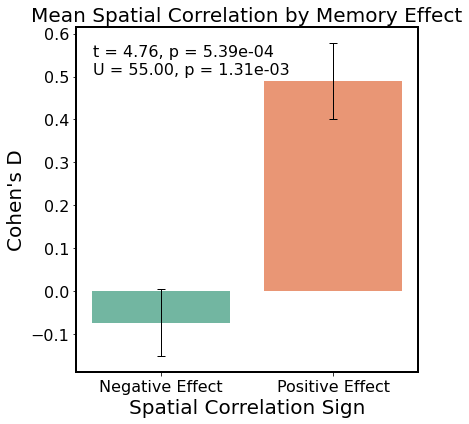

In [8]:
from calvin_utils.statistical_utils.dynamite_plot import DynamitePlotter
plotter = DynamitePlotter()
plotter.plot(
    df=data_df,
    xlabel="Spatial Correlation Sign",
    ylabel="Cohen's D",
    group_col=x_col,
    y_col=y_col,
    dataset_name='Mean Spatial Correlation by Memory Effect',
    out_dir=out_dir
)